Christopher Zdyrski Python Assignment
Due: 5/5/2021
Github repository with neccesary files
https://github.com/czdyrski/BCB546-PythonHW_Spring2021

Install and import necessary packages

In [56]:
#Confirm that python, biopython, and seaborn are installed and up to date
#import packages
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt

Function #1: Retrieve Sequences

In [57]:
#It gets sequence data from a fasta file type and return a dictionary

def get_sequences_from_file(fasta_fn):
    
    #makes a dictionary variable
    sequence_data_dict = {}
    
    #creates a variable description  and parses out the names and seqeunces
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
        
    #returns the completed dictionary    
    return(sequence_data_dict)

Function #2 Translates Function

In [58]:
#Takes a string of nucleotides and translates it to a list of amino acids
def translate_function(string_nucleotides): 
    
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    
    #Make a blank variable to hold amino acid seqence
    #For loop to cycle through each codon do this by groups of 3's

    #Loops through every third nucleotide to identify the codons
    raw_codon = [string_nucleotides[i:i+3] for i in range(0, len(string_nucleotides), 3)]
    
    #Makes a blank list
    aa_seq_string = []
                                                                                 
    #For loop to search for the word "stop" codon
    for location in raw_codon:
        aa = mito_table.forward_table.get(location, "Stop")
        if aa == "Stop":
            break
        #If not a stop codon it appends it the the growing list of amino acids
        else:
            aa_seq_string.append(aa)

    #Saw how to concatenate the list on Stack Overflow
    #https://stackoverflow.com/questions/4166641/how-can-i-optimally-concat-a-list-of-chars-to-a-string
    
    #Return amino acids translated from nucleotides
    return(''.join(aa_seq_string))       

Function #3: Alternative Translation Function 

In [59]:
#This is my own translation function taking a string of nucleotides and converting them to amino acid using Biopython
#Biopython tutorial and help
#https://biopython.org/docs/1.75/api/Bio.Seq.html

def alternative_translation_function(string_nucleotides): 
    
    #For description of the table option and to_stop option
    #https://biopython.org/wiki/Seq
    translated_sequence = string_nucleotides.translate(table=2, to_stop=True)
    
    return(translated_sequence)

Function #4: Molecular Weight

In [60]:
#Calculates the molecular weight of each amino acid sequence
#Function takes in an amino acid sequence as a string and outputs a moleuclar weight as a double
def compute_molecular_weight(aa_seq):
    
        #The ProtParam functions requires aa_seq to be a string
        #Ran the ProteinAnalysis() function on aa_seq
        protein_analysis_output = ProteinAnalysis(str(aa_seq))

        mol_weight = protein_analysis_output.molecular_weight()
        
        #Return the molecular weight
        return(mol_weight)

Function #5: GC Content

In [61]:
#Computes the GC-content of each DNA sequence
#Function takes in a DNA sequence and returns the GC content as a double
#Setup loop from this resource https://www.w3schools.com/python/python_for_loops.asp

def compute_gc_content(dna_seq):
    
    #Initialize i and gc_total to 0
    i = 0
    gc_total = 0
    
    #Read through each nucleotide and if it is a C or G increase total by 1
    for i in dna_seq:

        #Count if nucleotide is either G or C
        if ((i == "G") or (i == "C")):
            gc_total = gc_total + 1

    #Divide the total GC content by the length of the DNA sequence and multiply it by 100
    gc_content = ((gc_total) / (len(dna_seq))) * 100
    
    #Return the proprotion of GC in the total sequence
    return(gc_content)

####Main####
     This is where I use the functions I finished above

In [62]:
#Getting sequences form a Fasta file, turning it into a dataframe, and then a list
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

Step 6: Add Columns

In [63]:
#Used this resource to add new columns quickly
#https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/

#prints original two column table with empty columns
print(bears_df)

bears_df['Molecular_Weight'] = 'NaN'
bears_df['GC_content'] = 'NaN'

#prints table with two new empty columns
print(bears_df)

                  species     mass
0          Ursus spelaeus  550.800
1            Ursus arctos  203.500
2        Ursus thibetanus   99.714
3        Melursus ursinus  100.030
4        Ursus americanus  110.560
5     Helarctos malayanus   47.020
6  Ailuropoda melanoleuca  118.200
7      Tremarctos ornatus  140.700
8         Ursus maritimus  425.100
                  species     mass Molecular_Weight GC_content
0          Ursus spelaeus  550.800              NaN        NaN
1            Ursus arctos  203.500              NaN        NaN
2        Ursus thibetanus   99.714              NaN        NaN
3        Melursus ursinus  100.030              NaN        NaN
4        Ursus americanus  110.560              NaN        NaN
5     Helarctos malayanus   47.020              NaN        NaN
6  Ailuropoda melanoleuca  118.200              NaN        NaN
7      Tremarctos ornatus  140.700              NaN        NaN
8         Ursus maritimus  425.100              NaN        NaN


Step 7: For Loop

In [64]:
#Initialize row variable to the first row
row = 0

for key, value in cytb_seqs.items():
    
    aa_seq = translate_function(value)
    
    #get the molecular weight of aa_seq and fills in dataframe
    calculated_mol_weight = compute_molecular_weight(aa_seq)
    bears_df.loc[row, "Molecular_Weight"] = calculated_mol_weight
    
    #get the GC content of the DNA sequence and fills in dataframe
    calculated_gc_content = compute_gc_content(value)
    bears_df.loc[row, "GC_content"] = calculated_gc_content
    
    #iterate through the rows by adding one each time
    row = row + 1

#View filled in dataframe
print(bears_df)

                  species     mass Molecular_Weight GC_content
0          Ursus spelaeus  550.800       42458.7992   43.77193
1            Ursus arctos  203.500       42414.7435   43.77193
2        Ursus thibetanus   99.714       42306.6735  45.614035
3        Melursus ursinus  100.030         42551.99  45.175439
4        Ursus americanus  110.560       42427.7439  43.947368
5     Helarctos malayanus   47.020        42560.891  44.298246
6  Ailuropoda melanoleuca  118.200       42702.1845  40.789474
7      Tremarctos ornatus  140.700       42384.8266  44.385965
8         Ursus maritimus  425.100       42454.7873  44.298246


In [65]:
#Need this line in order to plot in Jupyter notebook or Spyder
#Used the class resource website https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/

%matplotlib inline

Step 8: Bar-chart

<AxesSubplot:title={'center':'Mass of Each Bear Species'}, xlabel='species'>

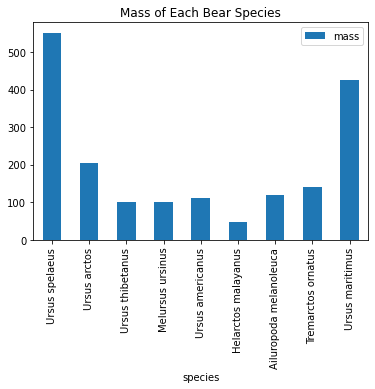

In [66]:
bears_df.plot(x = "species", y = "mass", kind = "bar", title = "Mass of Each Bear Species")

Q1: What is the largest bear species?
#The largest species of bear is Ursus spelaeous with a mass of 550.8.
Q2: What else is interesting about this species?
Q2: It's is also interesting that this species went extinct but in 2013 researhcers were able to sequence mitochondrial DNA from a bone fragment of an individual which dated back more than 300,000 years.
#Source https://www.britannica.com/animal/cave-bear

Step 9: Plot

<AxesSubplot:title={'center':'Molecular Weight vs GC content across Bear Species'}, xlabel='Molecular_Weight', ylabel='GC_content'>

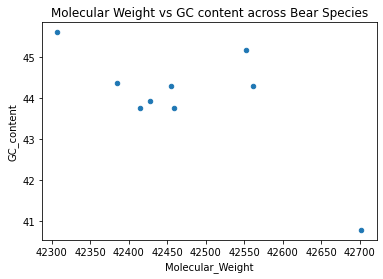

In [67]:
bears_df.plot(x = "Molecular_Weight", y = "GC_content", kind = "scatter", title = "Molecular Weight vs GC content across Bear Species")

Step 10: New Dataframe

In [68]:
#Simply save the dataframe to a csv file
bears_df.to_csv("bears_mass_cytb.csv")

Step 11: Bonus

In [69]:
#Some other interesting things that can be done include:
#Identifying how many PAMs are present for CRISPR/Cas9 (NGG)
#Scanning the Fasta seqeunces for certain genetic factors (repeats, inverted terminal repeats aka transposons)
#Look for homology across species by using a sliding window approach
#Could probably use Biopython to make a phyologeny, see below
#from Bio import Phylo, Bio.Phylo.BaseTree
#https://biopython.org/wiki/Phylo

In [ ]:
#Confirm what data types each variable are
#https://stackoverflow.com/questions/37718907/variable-explorer-in-jupyter-notebook

In [75]:
whos

Variable                           Type         Data/Info
---------------------------------------------------------
CodonTable                         module       <module 'Bio.Data.CodonTa<...>io\\Data\\CodonTable.py'>
ProteinAnalysis                    type         <class 'Bio.SeqUtils.ProtParam.ProteinAnalysis'>
Seq                                type         <class 'Bio.Seq.Seq'>
SeqIO                              module       <module 'Bio.SeqIO' from <...>Bio\\SeqIO\\__init__.py'>
aa_seq                             str          MTNIRKTHPLAKIINNSFIDLPTPS<...>SILYFTILLVLMPIAGIIENNLLKW
alternative_translation_function   function     <function alternative_tra<...>on at 0x0000029BAB7194C0>
bears_df                           DataFrame                      species<...>    42454.7873  44.298246
calculated_gc_content              float        44.29824561403509
calculated_mol_weight              float        42454.78729999998
compute_gc_content                 function     <function compute